## Data - EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.listdir('/content/drive/My Drive/Colab Notebooks/data/nlp')

['ChatbotData.csv']

In [ ]:
data_path = '/content/drive/My Drive/Colab Notebooks/data/nlp/ChatbotData.csv'

In [ ]:
import pandas as pd

In [ ]:
# data_path = './ChatbotData.csv'

In [ ]:
data = pd.read_csv(data_path, encoding='utf-8')

In [ ]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [ ]:
!pip install konlpy

In [ ]:
import konlpy

In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

In [ ]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [ ]:
# 전체 문장 분석을 위해 Q, A 통합 
sentences = list(data['Q']) + list(data['A']) 

In [ ]:
# 모든 문장에 대해 형태소 분리 
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences ] 

In [ ]:
morph_tokenized_sentences[:3] 

[['12시', '땡', '!'], ['1', '지망', '학교', '떨어졌어'], ['3', '박', '4일', '놀러가고싶다']]

In [ ]:
# 각 문장이 몇개의 형태소로 구성되어 있는지?
sent_len_by_morph = [ len(t) for t in morph_tokenized_sentences]

In [ ]:
print(sent_len_by_morph)

[3, 4, 4, 4, 2, 3, 4, 5, 9, 7, 5, 2, 4, 5, 3, 4, 5, 4, 5, 6, 5, 4, 5, 5, 3, 6, 3, 3, 5, 3, 4, 4, 6, 5, 4, 5, 4, 4, 3, 4, 4, 4, 4, 3, 2, 3, 2, 3, 2, 4, 3, 3, 3, 2, 4, 1, 4, 4, 3, 7, 5, 4, 7, 6, 2, 4, 6, 3, 2, 4, 2, 2, 4, 7, 6, 6, 5, 3, 7, 6, 3, 4, 2, 2, 3, 5, 3, 4, 3, 2, 5, 7, 6, 2, 2, 4, 4, 6, 6, 4, 2, 2, 6, 4, 5, 4, 5, 2, 3, 2, 3, 3, 6, 5, 3, 8, 3, 4, 1, 2, 1, 4, 4, 1, 4, 6, 6, 8, 3, 2, 4, 2, 4, 4, 5, 6, 3, 4, 4, 5, 4, 6, 5, 6, 6, 3, 2, 6, 3, 4, 7, 4, 9, 5, 7, 6, 5, 4, 3, 4, 4, 5, 2, 3, 3, 2, 4, 4, 4, 5, 2, 4, 4, 3, 4, 4, 7, 6, 3, 5, 4, 2, 2, 3, 2, 5, 5, 2, 3, 6, 3, 2, 3, 5, 4, 2, 2, 6, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 4, 4, 4, 3, 4, 5, 3, 5, 5, 4, 3, 5, 5, 4, 3, 4, 3, 7, 3, 8, 3, 4, 5, 4, 5, 4, 4, 4, 5, 2, 2, 2, 6, 3, 2, 5, 3, 6, 4, 5, 3, 2, 5, 4, 2, 3, 4, 5, 3, 5, 4, 2, 3, 2, 3, 2, 5, 5, 2, 4, 4, 2, 6, 3, 3, 9, 6, 8, 4, 5, 2, 3, 2, 3, 3, 3, 6, 6, 2, 3, 4, 2, 3, 3, 1, 2, 2, 1, 2, 2, 2, 2, 4, 3, 6, 6, 5, 5, 4, 4, 3, 3, 4, 3, 3, 3, 9, 4, 3, 5, 4, 4, 2, 2, 4, 3, 6, 5, 4, 6, 2, 7, 2, 3, 

In [ ]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(token) for token in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ','')) for s in sentences] 

In [ ]:
sent_len_by_token, sent_len_by_eumjeol

Text(0, 0.5, 'Number of Sentences')

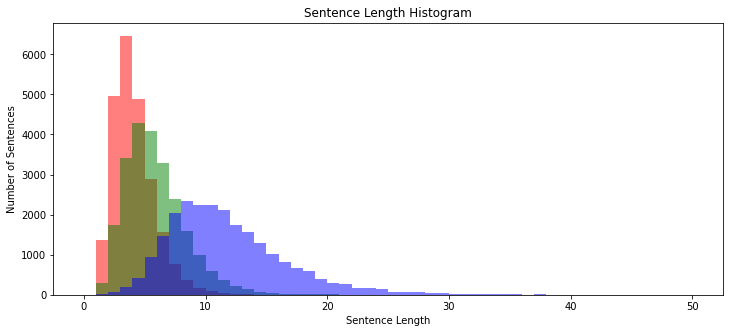

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
# 음절, 어절 

plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

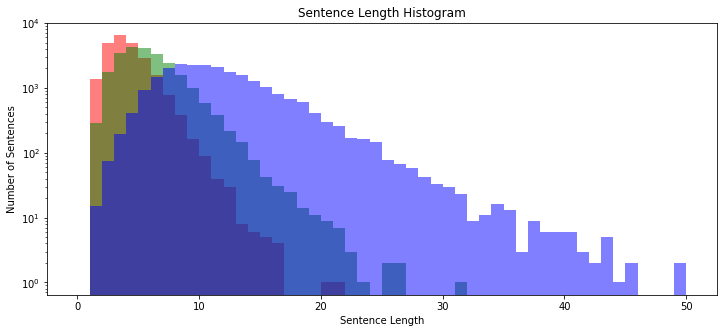

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')

plt.yscale('log')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

{'boxes': [<matplotlib.lines.Line2D at 0x7f7546b0c9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7546b17438>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7546b60d30>,
 'means': [<matplotlib.lines.Line2D at 0x7f7546b17eb8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7546b17b38>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7546b0ccf8>,
  <matplotlib.lines.Line2D at 0x7f7546b35940>]}

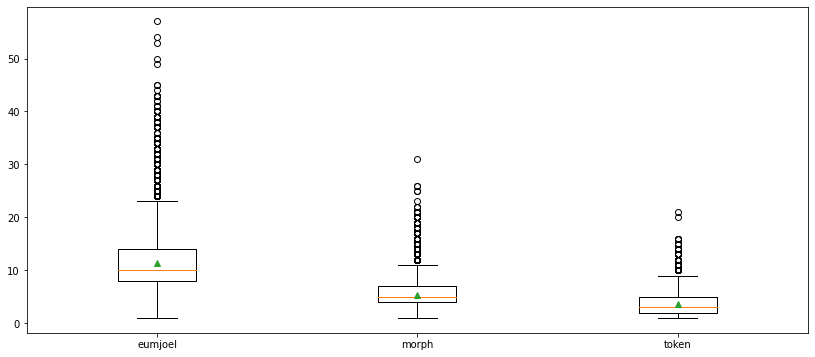

In [ ]:
plt.figure(figsize=(14,6))
plt.boxplot([sent_len_by_eumjeol, sent_len_by_morph, sent_len_by_token], 
            labels=['eumjoel', 'morph', 'token'], 
            showmeans=True)

In [ ]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

q_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences ] 
a_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences ] 

In [ ]:
q_sent_len_by_morph = [len(t) for t in q_morph_tokenized_sentences]
a_sent_len_by_morph = [len(t) for t in a_morph_tokenized_sentences]

{'boxes': [<matplotlib.lines.Line2D at 0x7f7546ae24a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7546adac88>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7546c1dd30>,
 'means': [<matplotlib.lines.Line2D at 0x7f7546bebe10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7546beb5f8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7546ae27b8>,
  <matplotlib.lines.Line2D at 0x7f7546c2b6d8>]}

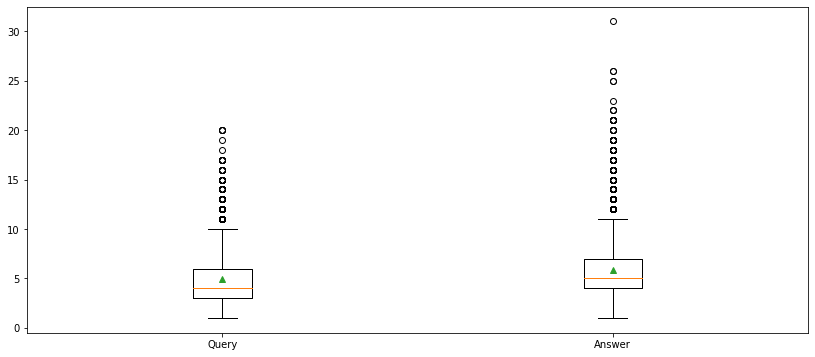

In [ ]:
plt.figure(figsize=(14,6))
plt.boxplot([q_sent_len_by_morph, a_sent_len_by_morph], 
            labels=['Query', 'Answer'], 
            showmeans=True)

* 명사만 추출
* wordcloud 생성

In [ ]:
# query_sentences = list(data['Q'])
# answer_sentences = list(data['A'])

In [ ]:
q_NVA_token_sentences = list()
a_NVA_token_sentences = list()

for s in query_sentences:
  for token, tag in okt.pos(s.replace(' ','')):
    if tag == 'Noun' or  tag == 'Verb' or  tag == 'Adjective':
      q_NVA_token_sentences.append(token)

for s in answer_sentences:
  for token, tag in okt.pos(s.replace(' ','')):
    if tag == 'Noun' or  tag == 'Verb' or  tag == 'Adjective':
      a_NVA_token_sentences.append(token)

In [ ]:
q_wordcloud_input = ' '.join(q_NVA_token_sentences)
a_wordcloud_input = ' '.join(a_NVA_token_sentences)

In [ ]:
from wordcloud import WordCloud

In [ ]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
# 이 부분은 본 예제에서는 무시해도 됨
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10,10)

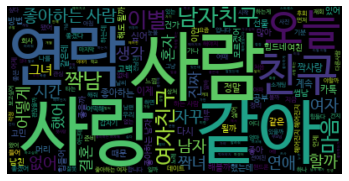

In [ ]:
q_wordcloud = WordCloud(font_path='/usr/share/fonts/NanumBarunGothic').generate(q_wordcloud_input)

plt.imshow(q_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

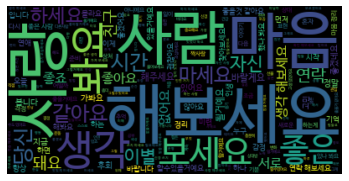

In [ ]:
a_wordcloud = WordCloud(font_path='/usr/share/fonts/NanumBarunGothic').generate(a_wordcloud_input)

plt.imshow(a_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()